title: 'Data scientists salary'

author: 'Gamaliel Mendoza'

date: 25/May/25

In [1]:
#date: "{{ datetime.now().strftime('%Y-%m-%d') }}"
import os
DSD='C:\\Users\\Gamaliel\\Documents\\G\\ADD\\Data_Science_Projects\\Data-Science-Projects'
proj=DSD+'\\DS_Sal'
LT='C:\\Users\\Gamaliel\\Downloads\\'
os.chdir(proj)
fzip='salary-prediction-salary-dataset.zip'
zip_filepath = 'https://www.kaggle.com/datasets/adilshamim8/salary-prediction-salary-dataset/croissant/download'
csv_filename = 'salary_prediction_updated_dataset.csv'
# load pretty jupyter's magics
%load_ext pretty_jupyter

In [2]:
#!pip install kaggle
import kaggle
import requests
import zipfile
!kaggle datasets download adilshamim8/salary-prediction-salary-dataset;

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/adilshamim8/salary-prediction-salary-dataset;


In [3]:
import zipfile
import requests
import pandas as pd

def load_csv_from_zip(zip_filepath, csv_filename):
    
    try:
        with zipfile.ZipFile(zip_filepath, 'r') as z:
            with z.open(csv_filename) as f:
                df = pd.read_csv(f)
        return df
    except FileNotFoundError:
        print(f"Error: Zip file not found at '{zip_filepath}'.")
        return None
    except KeyError:
        print(f"Error: CSV file '{csv_filename}' not found in the zip archive.")
        return None
    except Exception as e:
         print(f"An error occurred: {e}")
         return None

# Example Usage
#print(proj+'\\'+fzip)
df = load_csv_from_zip(proj+'\\'+fzip, csv_filename)
#if df is not None:
    #print(df.head())

In [4]:
import sqlite3
%load_ext sql
con=sqlite3.connect('DS_sal.db')
cursor=con.cursor()
%sql sqlite:///DS_sal.db
df.to_sql("salary_prediction_updated_datas",con,if_exists='replace')

100000

In [5]:
#Display the data
# With SQLite
#%sql Select * from salary_prediction_updated_datas limit 5;
# Done with pandas
#print(df.head())

In [6]:
%sql alter table salary_prediction_updated_datas rename 'Job Role' to Job;
%sql alter table salary_prediction_updated_datas rename 'Education Level' to Education;
#allDS=pd.read_sql_query("update salary_prediction_updated_datas set Education = Bachelor WHERE Education LIKE \'%Bach%\' ",con)
#allDS=pd.read_sql_query("update salary_prediction_updated_datas set Education = Master where Education like Master's",con)
%sql update salary_prediction_updated_datas set salary = salary/12;

 * sqlite:///DS_sal.db
Done.
 * sqlite:///DS_sal.db
Done.
 * sqlite:///DS_sal.db
100000 rows affected.


[]

In [7]:
sql select * from salary_prediction_updated_datas limit 5

 * sqlite:///DS_sal.db
Done.


index,YearsExperience,Education,Job,Salary
0,14.98,PhD,Marketing Specialist,6488.436666666667
1,38.03,PhD,Software Engineer,13906.698333333334
2,29.28,Bachelor's,Business Analyst,10297.772500000001
3,23.95,Master's,Marketing Specialist,7512.923333333333
4,6.24,Master's,Business Analyst,4660.950833333333


In [8]:
# We need to extract the data from the table. 
# One way to do wo is by extracting the queries from the tables as shown below

import re
phds=pd.read_sql_query("select * from salary_prediction_updated_datas where Education like 'PhD' AND Job = 'Data Scientist'",con);
bach=pd.read_sql_query("select * from salary_prediction_updated_datas where Education like '%Bachelor%' AND Job LIKE \'%Data%\'",con);
mast=pd.read_sql_query("select * from salary_prediction_updated_datas where Education like '%Master%' AND Job LIKE '%Data%'",con);
allDS=pd.read_sql_query("select * from salary_prediction_updated_datas where Job = 'Data Scientist'",con);
allDS2=cursor.execute("select * from salary_prediction_updated_datas where Job LIKE '%Data%'")
allDS2=pd.DataFrame(cursor.fetchall())
allDS2.rename(columns={0:"Index",1:"YearsExperience",2:"Education Level",3:"Job Role",4:"Salary"});
DSs=df[df['Job Role']=="Data Scientist"]
DSs['Salary']=DSs['Salary']/12
Baches=DSs[DSs['Education Level']=="Bachelor's"]
Masters=DSs[DSs['Education Level']=="Master's"]
Docs=DSs[DSs['Education Level']=="PhD"]

C:\Users\Gamaliel\AppData\Local\Temp\ipykernel_5628\2621893303.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DSs['Salary']=DSs['Salary']/12


In [9]:
print('We make sure everything can be extracted by two means\n')
print('For all Data Scientists')
print(['Pandas Query: {:1}, SQLite3 Query: {:1}, Dataframe extraction: {:1}'.format(allDS.shape[0],allDS2.shape[0],DSs.shape[0])])

print("\nFor Bachelor's")
print(['Pandas Query: {:1}, Dataframe extraction: {:1}'.format(bach.shape[0],Baches.shape[0])])

print("\nFor Master's")
print(['Pandas Query: {:1}, Dataframe extraction: {:1}'.format(mast.shape[0],Masters.shape[0])])

print('\nFor PhDs')
print(['Pandas Query: {:1}, Dataframe extraction: {:1}'.format(phds.shape[0],Docs.shape[0])])



We make sure everything can be extracted by two means

For all Data Scientists
['Pandas Query: 20127, SQLite3 Query: 20127, Dataframe extraction: 20127']

For Bachelor's
['Pandas Query: 4074, Dataframe extraction: 4074']

For Master's
['Pandas Query: 4012, Dataframe extraction: 4012']

For PhDs
['Pandas Query: 3969, Dataframe extraction: 3969']


In [10]:
# I used the pandas datafram because it can be used easily in loops
DSs=df[df['Job Role']=="Data Scientist"]
DSs['Salary']=DSs['Salary']/12

C:\Users\Gamaliel\AppData\Local\Temp\ipykernel_5628\3076103669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DSs['Salary']=DSs['Salary']/12


[Linear Regression](https://www.geeksforgeeks.org/linear-regression-python-implementation/)

## Data scientists' income can be is expressed in a linear fashion

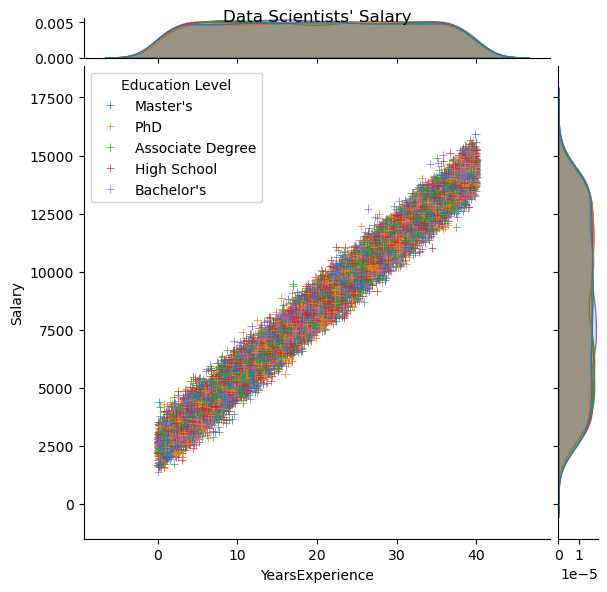

In [11]:
#Plotted the Salary vs the years of experience
#import libraries
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import scipy
#Create a joint plot
dtpt=DSs
fig= plt.figure
j=sb.jointplot(data=dtpt,x='YearsExperience',y='Salary',ratio=10,hue='Education Level',marker='+',marginal_ticks=True)
x=np.array(dtpt['YearsExperience'])
y=np.array(dtpt['Salary'])
X=x[np.isnan(x)==False]
Y=y[np.isnan(y)==False]
minl=min([len(X),len(Y)])
X=X[0:minl]
Y=Y[0:minl]
# Obtained correlation coefficients for the data
corrs=scipy.stats.pearsonr(X,Y)
r,p=scipy.stats.pearsonr(X,Y)

# Obtained the  slope and intercept as a measur for initial salaries from (x,y)

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)

intercept,slope=estimate_coef(X,Y)
r,p=scipy.stats.pearsonr(X,Y)
#otro, = j.ax_joint.plot([], [], linestyle="", alpha=0)
#j.ax_joint.legend([otro],['y=mx+b; y={:3.2f}x+{:3.2f}, r={:.3}, p={:2.3e}'.format(b_1,b_0,r,p)])
#j.ax_joint.legend([otro],['r={:.3}, p={:.3e}'.format(b_1,b_0,r,p)])
plt.suptitle('Data Scientists\' Salary');


In [12]:
print(['Linear regression: y=mx+b; y={:3.2f}x+{:3.2f}, r={:.3}, p={:.4e}'.format(intercept,slope,r,p)])

['Linear regression: y=mx+b; y=2503.50x+299.87, r=0.99, p=0.0000e+00']


## With people from different backgrounds:

In [13]:
numofClasses=pd.read_sql_query("select Education, count(*) as freq from salary_prediction_updated_datas where Job = 'Data Scientist' group by Education",con);
numofClasses

,Education,freq
0,Associate Degree,3989
1,Bachelor's,4074
2,High School,4083
3,Master's,4012
4,PhD,3969


## But everyone has the same chance.

In [14]:
TablaDeg=[]
for degree in numofClasses['Education']:
    base=DSs[DSs['Education Level']==degree]

    x=np.array(base['YearsExperience'])
    y=np.array(base['Salary'])
    X=x[np.isnan(x)==False]
    Y=y[np.isnan(y)==False]
    minl=min([len(X),len(Y)])
    X=X[0:minl]
    Y=Y[0:minl]

    
    r,p=scipy.stats.pearsonr(X,Y)
    intercept,slope=estimate_coef(X,Y)
    TablaDeg.append({"Degree":degree,"n=":x.shape[0],"Raise":slope,"Initial":intercept,"R\N{superscript two}":r,"P-value":round(p,4)})
Tabla=pd.DataFrame(TablaDeg)        
  

             Degree    n=       Raise      Initial        R²  P-value
0  Associate Degree  3989  299.225118  2523.878898  0.989961      0.0
1        Bachelor's  4074  299.434688  2514.954747  0.989211      0.0
2       High School  4083  299.968767  2500.494866  0.989780      0.0
3          Master's  4012  300.334733  2488.717294  0.989846      0.0
4               PhD  3969  300.410188  2489.167711  0.990213      0.0


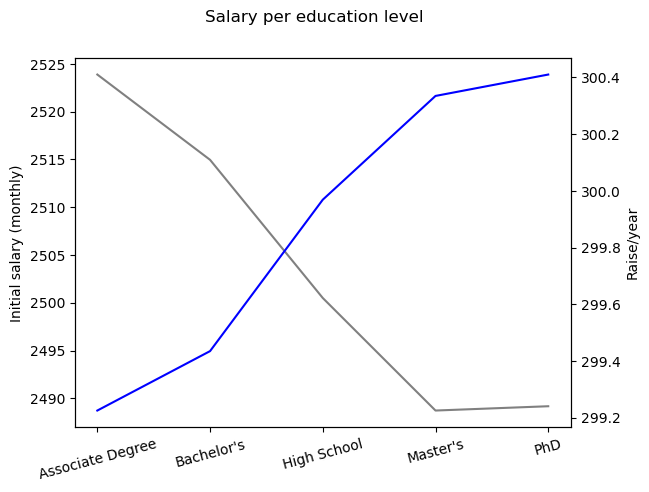

In [15]:
print(Tabla)
fig, ax=plt.subplots()
ax.plot(Tabla['Degree'],Tabla['Initial'], color='gray')#,
plt.ylabel('Initial salary (monthly)');
plt.xticks(rotation=15);
slp=plt.twinx()
slp.plot(Tabla['Degree'],Tabla['Raise'],color='Blue')
fig.suptitle('Salary per education level');
plt.ylabel('Raise/year');

## Take-home message

* It doesn't matter what level at which data scientists start their career.
    * Everyone start at the same point.
        *  Some of them earn ~$30 less than the others at the beginning.
        *  And they increase their salary at the same rate.

In [16]:
try:
    !jupyter nbconvert DS_Sal.ipynb --to html --template pj
except Exception as e:
    print('HTML not stored')

[NbConvertApp] Converting notebook DS_Sal.ipynb to html
[NbConvertApp] Writing 5952986 bytes to DS_Sal.html
